In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 20})

# Numerical solution to the KPZ Equation

We will use the standard mapping between the height in the KPZ equation with the free energy of a directed polymer at high temperature embedded in a 1+1 random potential.

We will consider a polymer with size $L = 2n$ bonds in a 1+1 random potential drawn from a gaussian distribution $\mathcal{N}(0,1)$. We need to consider all polymers that starts at (0,0) and end at (n,n), the polymer is only allowed to grow onto positive neighboring sites, so the "diagonal" d = x + y will be increased by one.

A polymer visiting a set $P$ of sites has an energy:
\begin{equation}
E_V (P) = \sum_{(x,y) \in P} \ V[x,y]
\end{equation}


The boltzmann weight is given by:
\begin{equation}
w_V (P) = e^{\frac{-E_V (P)}{T}}
\end{equation}


The partition function Z(V) is given by:
\begin{equation}
Z(V) = \sum_P w_V (P)
\end{equation}

Since the polymer can only increas on the "diagonal", we have a recurssion relation that will be used on our class for the partition function:
\begin{equation}
Z[x,y] = (Z[x-1,y] + Z[x,y-1]) e^{\frac{-V[x,y]}{T}}
\end{equation}

Where Z[x,y] is the partition function starting at (0,0) and ending on (x,y). So our final partition function will be given by:
\begin{equation}
Z(V) = Z[n,n]
\end{equation}



In [2]:
class KPZ:
    def __init__(self,n,T):
        """
        Initialization of our class. 
        Parameters:
        - n : Size of the polymer.
        - T : Temperature.
        """
        
        self.n = n + 1
        self.matrix = np.random.normal(size=(self.n,self.n))
        self.Z_matrix = np.zeros((self.n,self.n))
        self.T = T
    
    def Z(self,x,y):
        """
        Return the partition function for a polymer at point (x,y) at a heat bath T.
        """
        
        if x == 0 and y == 0:
            self.Z_matrix[x,y] = np.exp(-self.matrix[x,y])
        elif x == 0:
            self.Z_matrix[x,y] = (self.Z_matrix[x,y-1])*np.exp(-self.matrix[x,y]) 
        elif y == 0:
            self.Z_matrix[x,y] = (self.Z_matrix[x-1,y])*np.exp(-self.matrix[x,y])
        else:
            self.Z_matrix[x,y] = (self.Z_matrix[x-1,y] + self.Z_matrix[x,y-1])*np.exp(-self.matrix[x,y])
    
    def run(self):
        """
        Run the simulation and return the partition function Z(n,n).
        """
        for i in range(self.n):
            for j in range(self.n):
                self.Z(i,j)
        return self.Z_matrix[self.n-1,self.n-1]

### Simulation
Using the mapping between free energy an the height on the KPZ equation (H), we have:

\begin{equation}
H = log\left(\frac{Z(L,L)}{\bar{Z}}\right)
\end{equation}


\begin{equation}
t = \frac{2N}{T^4}
\end{equation}

So we can calculate $Z(V)$ doing various simulations for our disordered potential and then calculate the average for all samples $\bar{Z}$ and $P(H,t)$ is the histogram of values of H.

In this simulation we will have a fixed time ($t$) given by the above equation and verify the distribution $P(H,t)$.

In [3]:
def direct_sampling(N,temperature,samples= 1000):
    H_ = np.zeros(samples)
    for i in range(samples):
        Sol = KPZ(N,T = temperature)
        H_[i] = Sol.run()
    t = 2*N/float(temperature**4.)
    return t, H_

In [4]:
t, H = direct_sampling(N= 64,temperature= 6.72)

In [5]:
H__ = H/np.mean(H)

In [6]:
aux = np.log(H__)

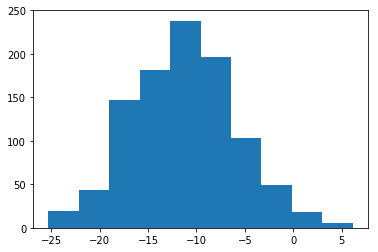

In [14]:
plt.hist(aux)
plt.show()